In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
df_train = pd.read_csv('F:\Datasets\wpbc.csv')
df_train.columns

Index(['col1', 'classLabel', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24',
       'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32',
       'col33', 'PredictLabel1', 'PredictLabel2'],
      dtype='object')

In [44]:
df_train['col3'].describe()

SyntaxError: invalid syntax (<ipython-input-44-f2205a19a6a9>, line 1)

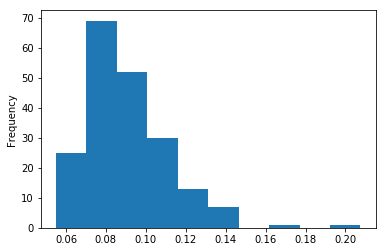

In [16]:
df_train['col33'].plot(kind="hist")

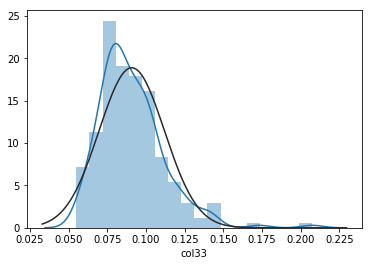

In [17]:
sns.distplot(df_train['col33'], fit = norm)

In [18]:
#check skewness
df_train['col33'].skew()

1.5146848795432215

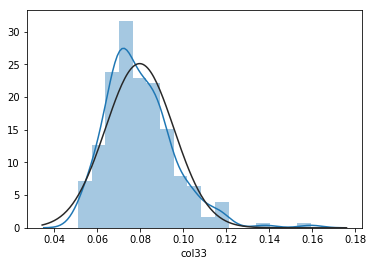

In [29]:
df_train['col33'] = np.log1p(df_train['col33'])
sns.distplot(df_train['col33'], fit = norm)

In [32]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]
print(total)
print(percent)

PredictLabel2    0
col9             0
col15            0
col14            0
col13            0
col12            0
col11            0
col10            0
col8             0
col17            0
col7             0
col6             0
col5             0
col4             0
col3             0
classLabel       0
col16            0
col18            0
PredictLabel1    0
col27            0
col33            0
col32            0
col31            0
col30            0
col29            0
col28            0
col26            0
col19            0
col25            0
col24            0
col23            0
col22            0
col21            0
col20            0
col1             0
dtype: int64
PredictLabel2    0.0
col9             0.0
col15            0.0
col14            0.0
col13            0.0
col12            0.0
col11            0.0
col10            0.0
col8             0.0
col17            0.0
col7             0.0
col6             0.0
col5             0.0
col4             0.0
col3             0.0
classLa

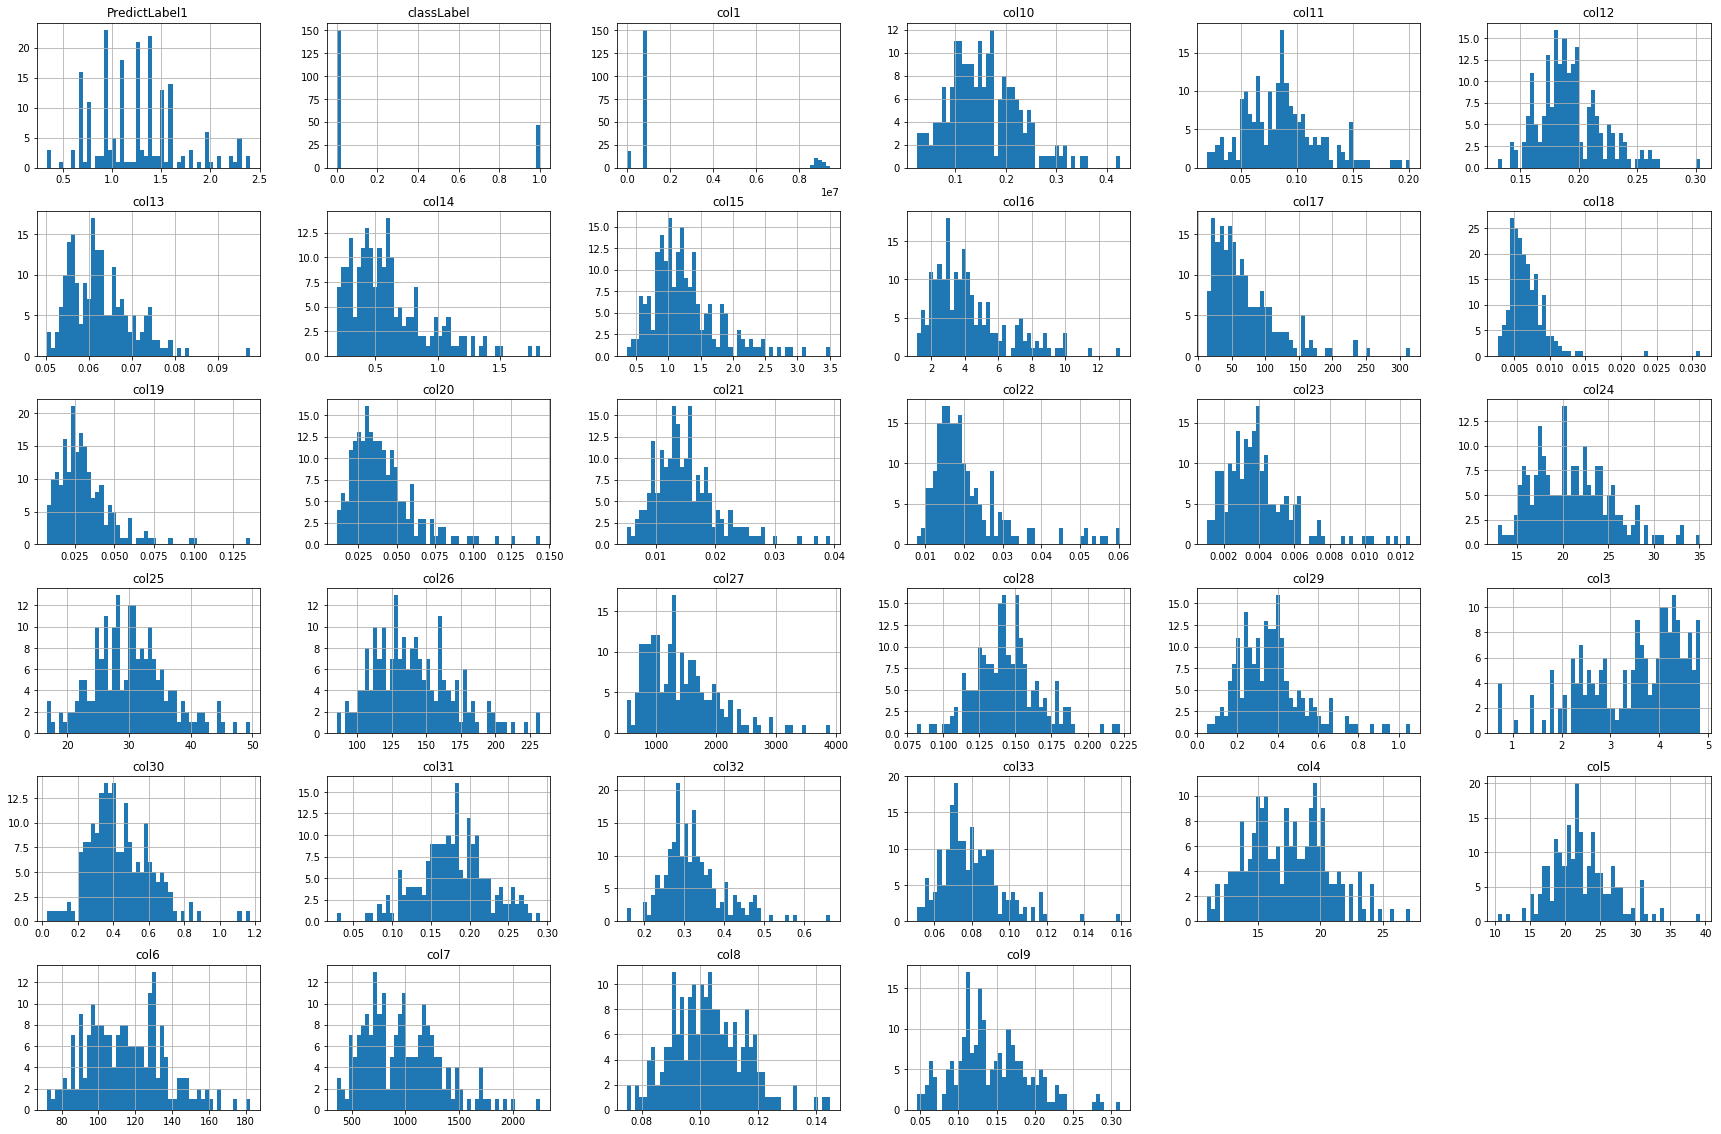

In [35]:
## BIVARIATE ANALYSIS
df_train.hist(bins=50, figsize=(30,20));

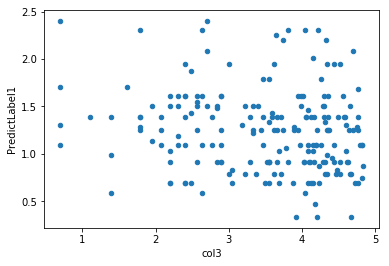

In [36]:
var = 'col3'
data = pd.concat([df_train['PredictLabel1'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='PredictLabel1')

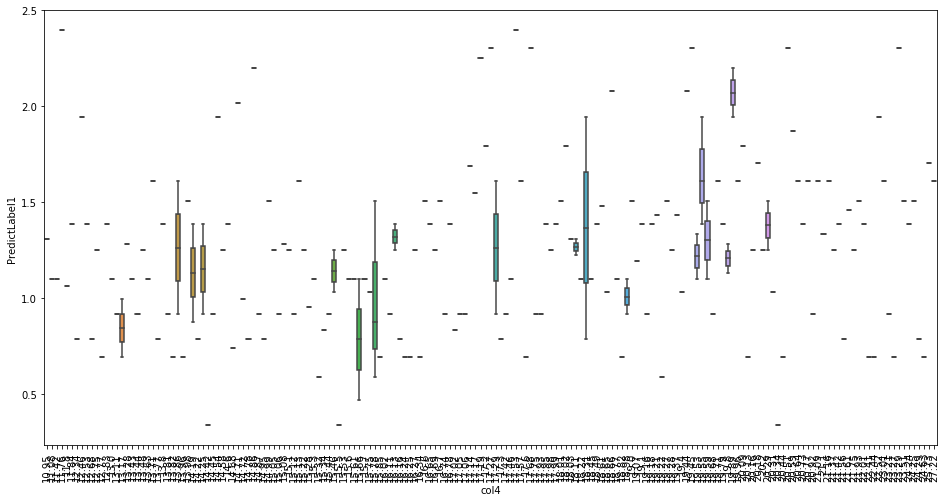

In [37]:
var = 'col4'
data = pd.concat([df_train['PredictLabel1'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="PredictLabel1", data=data)
plt.xticks(rotation=90);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


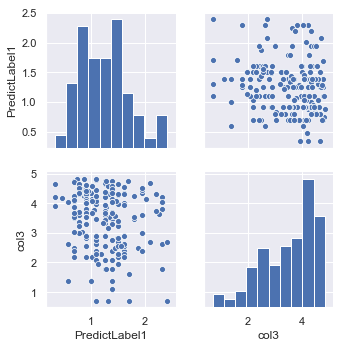

In [39]:
sns.set()
#cols = ['PredictLabel1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']
cols = ['PredictLabel1', 'col3']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

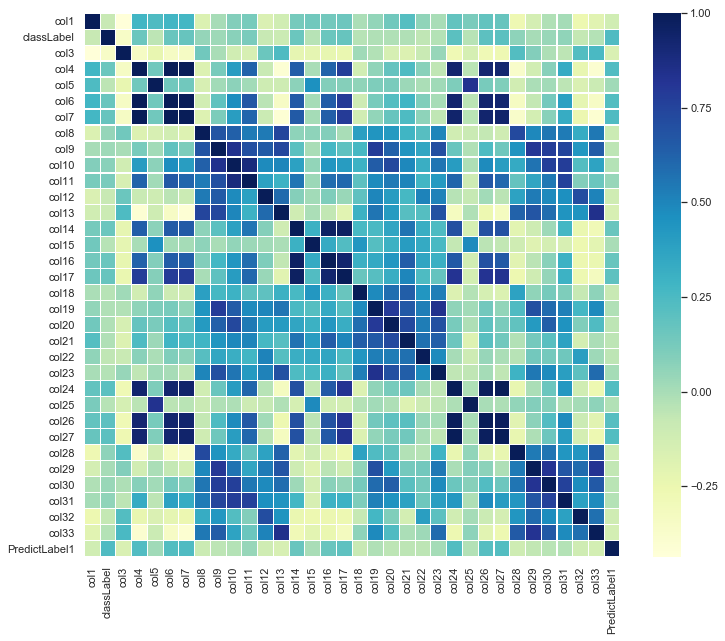

In [40]:
#Multivariate Analysis
corrmat = df_train.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

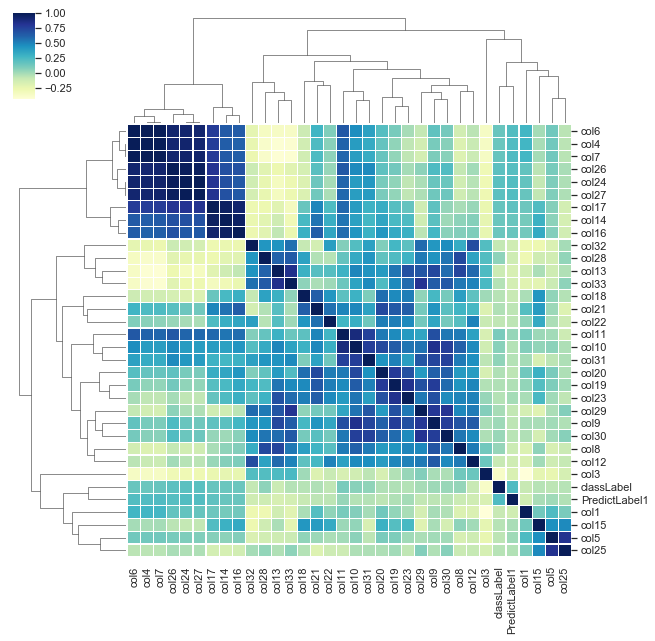

In [41]:
#correlation matrix
corrmat = df_train.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

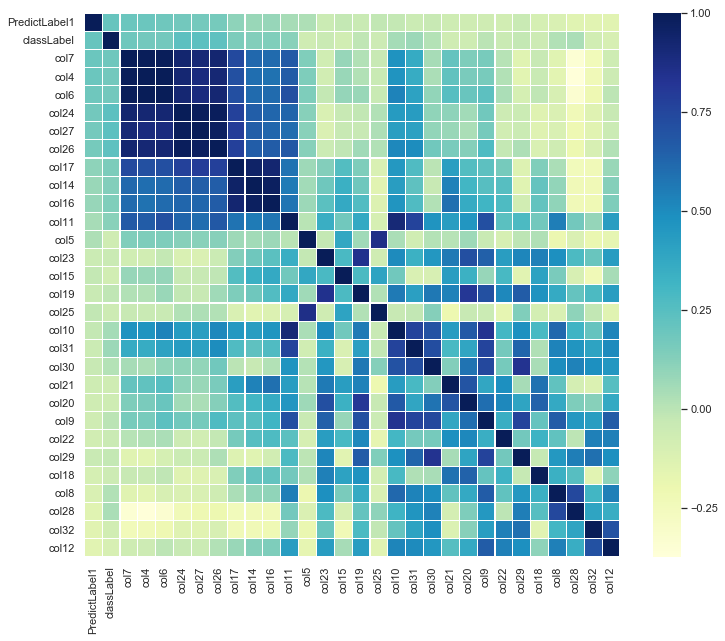

In [43]:
k=30
cols = corrmat.nlargest(k, 'PredictLabel1')['PredictLabel1'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)